In [1]:
# Import pandas dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
# Load cleaned byarea_df
c_byarea_df = pd.read_csv('../Resources/cleaned_byarea_df.csv', ',')
c_byarea_df.head()

C:\Users\yingk\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
0,Alabama,359.7,374.7,367.2,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999,397.3,413.8,405.5
1,Alabama,160.6,170.5,165.5,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999,184.8,196.1,190.4
2,Alabama,362.1,377.1,369.5,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000,403.2,419.8,411.4
3,Alabama,160.8,170.6,165.7,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000,186.5,197.9,192.2
4,Alabama,377.7,392.9,385.2,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001,423.3,440.3,431.7


In [3]:
# check c_byarea_df columns
c_byarea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949308 entries, 0 to 949307
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AREA                   949308 non-null  object 
 1   AGE_ADJUSTED_CI_LOWER  949308 non-null  float64
 2   AGE_ADJUSTED_CI_UPPER  949308 non-null  float64
 3   AGE_ADJUSTED_RATE      949308 non-null  float64
 4   EVENT_TYPE             949308 non-null  object 
 5   POPULATION             949308 non-null  int64  
 6   RACE                   949308 non-null  object 
 7   SEX                    949308 non-null  object 
 8   SITE                   949308 non-null  object 
 9   YEAR                   949308 non-null  int64  
 10  CRUDE_CI_LOWER         949308 non-null  float64
 11  CRUDE_CI_UPPER         949308 non-null  float64
 12  CRUDE_RATE             949308 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 94.2+ MB


In [4]:
# load smoking_rate.csv file
smoking_df = pd.read_csv('../Resources/smoking_rate.csv')
smoking_df.head(3)

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,24.3,23.8,21.5,21.1,21.4,21.5,20.9,19.2,20.2,17.2
1,Alaska,22.9,20.5,22.6,19.9,19.1,19.0,21.0,19.1,17.4,17.1
2,Arizona,19.3,17.1,16.3,16.5,14.0,14.7,15.6,14.0,14.9,13.1


In [5]:
# load obesity_rate.csv file
obesity_df = pd.read_csv('../Resources/obesity_rate.csv')
obesity_df.head(3)

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,33.0,32.0,33.0,32.4,33.5,35.6,35.7,36.3,36.2,36.1
1,Alaska,25.2,27.4,25.7,28.4,29.7,29.8,31.4,34.2,29.5,30.5
2,Arizona,25.2,25.1,26.0,26.8,28.9,28.4,29.0,29.5,30.0,31.4


In [6]:
# load per_capita_income file
income_df = pd.read_csv('../Resources/cleaned_per_capita_income.csv')
income_df.head(3)

,GeoName,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,28693,30672,31617,31839,32717,34280,35868,38120,39883,...,40683,42747,44548,44798,46887,48725,49613,51550,53786,56250
1,Alabama,23333,24306,25057,25648,26673,28434,29949,31474,32739,...,33946,35010,35824,36014,37055,38531,39014,40223,41539,43288
2,Alaska,29951,32044,33626,34756,35996,37016,39075,41157,43906,...,49652,52569,53708,52812,55867,57575,56278,57189,59618,61316


## prepare smoking data

In [7]:
# reshape smoking_df to long form to merge with cancer data
# how to: https://towardsdatascience.com/how-to-reshape-a-pandas-dataframe-98b42c428a8

# first need to rename each column in order to use the wide_to_long()
smoking_df.rename(columns={'2011':'smoking_2011',
                           '2012':'smoking_2012',
                           '2013':'smoking_2013',
                           '2014':'smoking_2014',
                           '2015':'smoking_2015',
                           '2016':'smoking_2016',
                           '2017':'smoking_2017',
                           '2018':'smoking_2018',
                           '2019':'smoking_2019',
                           '2020':'smoking_2020'}, inplace=True)

In [8]:
smoking_df.head()

,State,smoking_2011,smoking_2012,smoking_2013,smoking_2014,smoking_2015,smoking_2016,smoking_2017,smoking_2018,smoking_2019,smoking_2020
0,Alabama,24.3,23.8,21.5,21.1,21.4,21.5,20.9,19.2,20.2,17.2
1,Alaska,22.9,20.5,22.6,19.9,19.1,19.0,21.0,19.1,17.4,17.1
2,Arizona,19.3,17.1,16.3,16.5,14.0,14.7,15.6,14.0,14.9,13.1
3,Arkansas,27.0,25.0,25.9,24.7,24.9,23.6,22.3,22.7,20.2,21.1
4,California,13.7,12.6,12.5,12.9,11.7,11.0,11.3,11.2,10.0,8.8


In [9]:
# convert smoking_df to long format
smoking_long_df = pd.wide_to_long(smoking_df, 
                              stubnames=['smoking'],
                              i='State',
                              j='YEAR',
                              sep="_",
                              suffix='\w+')
smoking_long_df

,,smoking
State,YEAR,
Alabama,2011,24.3
Alaska,2011,22.9
Arizona,2011,19.3
Arkansas,2011,27.0
California,2011,13.7
...,...,...
West Virginia,2020,22.0
Wisconsin,2020,13.3
Wyoming,2020,16.4


In [10]:
# Adding back index for ease of merging later
smoking_long_df = smoking_long_df.reset_index()
smoking_long_df

,State,YEAR,smoking
0,Alabama,2011,24.3
1,Alaska,2011,22.9
2,Arizona,2011,19.3
3,Arkansas,2011,27.0
4,California,2011,13.7
...,...,...,...
525,West Virginia,2020,22.0
526,Wisconsin,2020,13.3
527,Wyoming,2020,16.4
528,Guam,2020,20.0


## prepare obesity data

In [11]:
# reshape obesity_df to long form to merge with cancer data
obesity_df.rename(columns={'2010':'obesity_2010',
                           '2011':'obesity_2011',
                           '2012':'obesity_2012',
                           '2013':'obesity_2013',
                           '2014':'obesity_2014',
                           '2015':'obesity_2015',
                           '2016':'obesity_2016',
                           '2017':'obesity_2017',
                           '2018':'obesity_2018',
                           '2019':'obesity_2019'}, inplace=True)

In [12]:
# convert obesity_df to long format
obesity_long_df = pd.wide_to_long(obesity_df, 
                              stubnames=['obesity'],
                              i='State',
                              j='YEAR',
                              sep="_",
                              suffix='\w+')
obesity_long_df

,,obesity
State,YEAR,
Alabama,2010,33.0
Alaska,2010,25.2
Arizona,2010,25.2
Arkansas,2010,30.9
California,2010,24.7
...,...,...
West Virginia,2019,39.7
Wisconsin,2019,34.2
Wyoming,2019,29.7


## prepare INCOME data

In [13]:
# first need to rename each column in order to use the wide_to_long()
income_df.rename(columns={'1999':'INCOME_1999',
                       '2000':'INCOME_2000',
                       '2001':'INCOME_2001',
                       '2002':'INCOME_2002',
                       '2003':'INCOME_2003',
                       '2004':'INCOME_2004',
                       '2005':'INCOME_2005',
                       '2006':'INCOME_2006',
                       '2007':'INCOME_2007',
                       '2008':'INCOME_2008',
                       '2009':'INCOME_2009',
                       '2010':'INCOME_2010',
                       '2011':'INCOME_2011',
                       '2012':'INCOME_2012',
                       '2013':'INCOME_2013',
                       '2014':'INCOME_2014',
                       '2015':'INCOME_2015',
                       '2016':'INCOME_2016',
                       '2017':'INCOME_2017',
                       '2018':'INCOME_2018',
                       '2019':'INCOME_2019',}, inplace=True)

In [14]:
# convert income_df to long format
income_long_df = pd.wide_to_long(income_df, 
                              stubnames=['INCOME'],
                              i='GeoName',
                              j='YEAR',
                              sep="_",
                              suffix='\w+')
income_long_df

,,INCOME
GeoName,YEAR,
United States,1999,28693
Alabama,1999,23333
Alaska,1999,29951
Arizona,1999,24960
Arkansas,1999,21871
...,...,...
Virginia,2019,59073
Washington,2019,64189
West Virginia,2019,42951


## prepare cancer data

In [15]:
# filter for rows for state lung cancer mortality rate by all sex and race 
cancer_df = c_byarea_df.loc[(c_byarea_df['EVENT_TYPE']=='Mortality') &
                              (c_byarea_df['SEX']=='Male and Female') &
                              (c_byarea_df['RACE']=='All Races') &
                              (c_byarea_df['SITE']=='Colon and Rectum') &
                              (c_byarea_df['YEAR']!= 20152019)
                              ]
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 2135 to 932609
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AREA                   1071 non-null   object 
 1   AGE_ADJUSTED_CI_LOWER  1071 non-null   float64
 2   AGE_ADJUSTED_CI_UPPER  1071 non-null   float64
 3   AGE_ADJUSTED_RATE      1071 non-null   float64
 4   EVENT_TYPE             1071 non-null   object 
 5   POPULATION             1071 non-null   int64  
 6   RACE                   1071 non-null   object 
 7   SEX                    1071 non-null   object 
 8   SITE                   1071 non-null   object 
 9   YEAR                   1071 non-null   int64  
 10  CRUDE_CI_LOWER         1071 non-null   float64
 11  CRUDE_CI_UPPER         1071 non-null   float64
 12  CRUDE_RATE             1071 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 117.1+ KB


In [16]:
cancer_df.head(3)

,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
2135,Alabama,17.7,20.3,19.0,Mortality,4430141,All Races,Male and Female,Colon and Rectum,1999,17.9,20.5,19.2
2137,Alabama,18.3,20.9,19.6,Mortality,4452173,All Races,Male and Female,Colon and Rectum,2000,18.7,21.3,19.9
2139,Alabama,17.8,20.4,19.1,Mortality,4467634,All Races,Male and Female,Colon and Rectum,2001,18.3,20.9,19.5


In [17]:
# Pick out just the columns needed for our multiple regression analysis
# CRUDE_RATE as the independent variable
cancer_mr_df = cancer_df[['AREA', 'YEAR', 'AGE_ADJUSTED_RATE']]
cancer_mr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 2135 to 932609
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA               1071 non-null   object 
 1   YEAR               1071 non-null   int64  
 2   AGE_ADJUSTED_RATE  1071 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.5+ KB


In [18]:
cancer_mr_df

,AREA,YEAR,AGE_ADJUSTED_RATE
2135,Alabama,1999,19.0
2137,Alabama,2000,19.6
2139,Alabama,2001,19.1
2141,Alabama,2002,18.7
2143,Alabama,2003,19.0
...,...,...,...
932599,Wyoming,2015,13.9
932603,Wyoming,2016,11.6
932605,Wyoming,2017,10.4
932607,Wyoming,2018,13.0


## prepare Multiple Regression data

In [19]:
# merge the cancer df and smoking df
mr_df = pd.merge(smoking_long_df, cancer_mr_df, how='left', left_on=['State', 'YEAR'], right_on=['AREA', 'YEAR'])
mr_df.head(3)

,State,YEAR,smoking,AREA,AGE_ADJUSTED_RATE
0,Alabama,2011,24.3,Alabama,16.3
1,Alaska,2011,22.9,Alaska,14.0
2,Arizona,2011,19.3,Arizona,13.3


In [20]:
mr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 0 to 529
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              530 non-null    object 
 1   YEAR               530 non-null    int64  
 2   smoking            529 non-null    float64
 3   AREA               459 non-null    object 
 4   AGE_ADJUSTED_RATE  459 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 24.8+ KB


In [21]:
# merge obesity to mr_df
mr_df = pd.merge(obesity_long_df, mr_df, how='left', left_on=['State', 'YEAR'], right_on=['AREA', 'YEAR'])
mr_df

,obesity,YEAR,State,smoking,AREA,AGE_ADJUSTED_RATE
0,33.0,2010,NaN,NaN,NaN,NaN
1,25.2,2010,NaN,NaN,NaN,NaN
2,25.2,2010,NaN,NaN,NaN,NaN
3,30.9,2010,NaN,NaN,NaN,NaN
4,24.7,2010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
525,39.7,2019,West Virginia,23.8,West Virginia,15.9
526,34.2,2019,Wisconsin,15.4,Wisconsin,11.9
527,29.7,2019,Wyoming,18.4,Wyoming,12.4
528,33.6,2019,NaN,NaN,NaN,NaN


In [22]:
# merge income to mr_df
mr_df = pd.merge(income_long_df, mr_df, how='left', left_on=['GeoName', 'YEAR'], right_on=['AREA', 'YEAR'])
mr_df

,INCOME,YEAR,obesity,State,smoking,AREA,AGE_ADJUSTED_RATE
0,28693,1999,NaN,NaN,NaN,NaN,NaN
1,23333,1999,NaN,NaN,NaN,NaN,NaN
2,29951,1999,NaN,NaN,NaN,NaN,NaN
3,24960,1999,NaN,NaN,NaN,NaN,NaN
4,21871,1999,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1087,59073,2019,31.9,Virginia,14.0,Virginia,12.8
1088,64189,2019,28.3,Washington,12.6,Washington,12.0
1089,42951,2019,39.7,West Virginia,23.8,West Virginia,15.9
1090,52893,2019,34.2,Wisconsin,15.4,Wisconsin,11.9


In [23]:
mr_df = mr_df.dropna()
mr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 625 to 1091
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   INCOME             458 non-null    int64  
 1   YEAR               458 non-null    int64  
 2   obesity            458 non-null    float64
 3   State              458 non-null    object 
 4   smoking            458 non-null    float64
 5   AREA               458 non-null    object 
 6   AGE_ADJUSTED_RATE  458 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 28.6+ KB


In [24]:
mr_df

,INCOME,YEAR,obesity,State,smoking,AREA,AGE_ADJUSTED_RATE
625,35010,2011,32.0,Alabama,24.3,Alabama,16.3
626,52569,2011,27.4,Alaska,22.9,Alaska,14.0
627,35321,2011,25.1,Arizona,19.3,Arizona,13.3
628,34279,2011,30.9,Arkansas,27.0,Arkansas,18.5
629,45557,2011,23.8,California,13.7,California,14.1
...,...,...,...,...,...,...,...
1087,59073,2019,31.9,Virginia,14.0,Virginia,12.8
1088,64189,2019,28.3,Washington,12.6,Washington,12.0
1089,42951,2019,39.7,West Virginia,23.8,West Virginia,15.9
1090,52893,2019,34.2,Wisconsin,15.4,Wisconsin,11.9


In [25]:
mr_df.drop(columns = ['AREA','YEAR','State'], inplace=True)
mr_df

C:\Users\yingk\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,INCOME,obesity,smoking,AGE_ADJUSTED_RATE
625,35010,32.0,24.3,16.3
626,52569,27.4,22.9,14.0
627,35321,25.1,19.3,13.3
628,34279,30.9,27.0,18.5
629,45557,23.8,13.7,14.1
...,...,...,...,...
1087,59073,31.9,14.0,12.8
1088,64189,28.3,12.6,12.0
1089,42951,39.7,23.8,15.9
1090,52893,34.2,15.4,11.9


In [26]:
corr = mr_df.corr()
corr.head()

,INCOME,obesity,smoking,AGE_ADJUSTED_RATE
INCOME,1.000000,-0.339503,-0.556185,-0.464700
obesity,-0.339503,1.000000,0.492728,0.443612
smoking,-0.556185,0.492728,1.000000,0.746538
AGE_ADJUSTED_RATE,-0.464700,0.443612,0.746538,1.000000


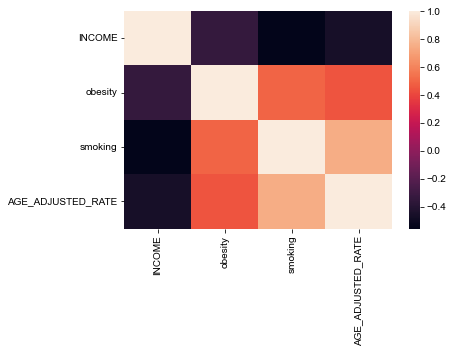

In [27]:
sns.heatmap(corr)
import seaborn as sns
sns.set(rc={'figure.figsize':(16,21)})

In [28]:
X = mr_df[['INCOME', 'obesity','smoking']]
y = mr_df['AGE_ADJUSTED_RATE']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
model = LinearRegression()
model.fit (X_train, y_train)

LinearRegression()

In [31]:
coef = model.coef_
print(coef)

[-2.28205477e-06  3.51069685e-02  3.51925167e-01]


In [32]:
intercept = model.intercept_
print(intercept)

6.801765755903384


In [33]:
pred_y = model.predict(X_train)
pred_y

array([17.20007597, 15.48512311, 13.61805282, 15.32338782, 12.33673099,
       17.31032403, 16.92953218, 12.06888132, 13.82074026, 13.99277552,
       13.35281459, 13.39307088, 13.43408231, 14.06724449, 15.72277526,
       12.43947198, 14.41213651, 12.91649204, 16.32069163, 15.3549519 ,
       15.38449139, 12.83363747, 12.99131617, 12.31645331, 12.26296878,
       14.78810655, 13.81167413, 14.83046831, 14.33240722, 15.66048609,
       12.7921655 , 13.373173  , 12.09175071, 15.2463266 , 15.68829958,
       13.85609973, 13.77997136, 13.18031141, 12.05582389, 12.85658668,
       14.34787198, 14.68999339, 15.49484255, 13.37990867, 16.57029787,
       14.90467814, 12.43901223, 13.94173652, 13.21029624, 12.14739564,
       13.32597947, 13.63802826, 15.99393091, 14.21129464, 13.80667336,
       13.58817654, 12.80351519, 17.2110477 , 15.53244353, 13.84221552,
       12.2873316 , 16.10157117, 11.64440189, 13.85870323, 15.40802558,
       13.50482136, 10.84085595, 16.98801355, 13.72960741, 13.82

In [34]:
y_test_pred = model.predict(X_test)

In [35]:
train_score = model.score(X_train, y_train)

In [36]:
test_score = model.score(X_test, y_test)

In [37]:
# R-squared value
train_score

0.5641256039571969

In [38]:
test_score

0.5683257727255908